# Introduction

In this project, I simulated the responsibilities of a data visualization developer at Yahoo Finance by visualizing stock information pertaining to Netflix. In finance, a stock profile is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data.

For the purposes of the project, I will only visualize data for the year of 2017. Specifically, I will create the following visualizations:

+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017

During this project, I will analyze, prepare, and plot data. The intention behind this project is to provide visualizations that will aid the financial analysts asses the risk of the Netflix stock.



### Importing Packages

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick

### Inspecting the Data

#### Netflix 

Loading the **NFLX.csv** into a DataFrame called `netflix_stocks`. Then, quickly inspecting the DataFrame

In [3]:
netflix_stocks = pd.read_csv('NFLX.csv')
netflix_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


Loading the **NFLX_daily_by_quarter.csv** into a DataFrame called `netflix_stocks_quarterly`. Then, quickly inspecting the DataFrame

In [4]:
netflix_stocks_quarterly = pd.read_csv('NFLX_daily_by_quarter.csv')
netflix_stocks_quarterly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


#### Dow Jones Industrial Average

Loading the **DJI.csv** into a DataFrame called `dowjones_stocks`. Then, quickly inspecting the DataFrame

In [5]:
dowjones_stocks = pd.read_csv('DJI.csv')
dowjones_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000


### Background Information

 - `NFLX` is the stock ticker symbol for Netflix and `^DJI` is the stock ticker symbol for the Dow Jones industrial Average, which is why the CSV files are named accordingly
 - In the Yahoo Data, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.
 - You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 

### Organzing our DataFrame

The term `Adj Close` is a confusing term. In Yahoo, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.

This means this is the column with the true closing price, so these data are very important.

Using Pandas I will change the name of of the column to `Adj Close` to `Price` so that it is easier to work with the data. 

In [7]:
netflix_stocks.rename(columns={'Adj Close' : 'Price'}, inplace = True)
netflix_stocks_quarterly.rename(columns={'Adj Close' : 'Price'}, inplace = True)
dowjones_stocks.rename(columns={'Adj Close' : 'Price'}, inplace = True)

## Visualizing our Data

### Average NFLX Price per Quarter

This visualization will provide us with information regarding the mean or average stock price per quarter for NFLX. It's nice to explore the data before plotting our eventual goal (violin plot).

Text(0.5, 1.0, 'Average Price per Quarter')

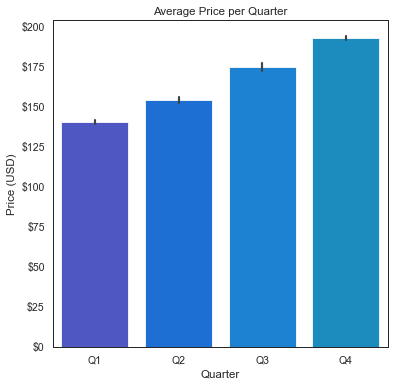

In [18]:
# Creating the figure 
f, ax = plt.subplots(figsize=(6, 6))

# Set color palette
colors = ['#3C47D6','#006CF1','#0085F1','#0097D8']
sns.set_palette(sns.color_palette(colors))
sns.set_style('white')

# Plotting the data
sns.barplot(x = 'Quarter', y = 'Price', data = netflix_stocks_quarterly)

# Formating the y-axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Formatting
plt.ylabel('Price (USD)')
plt.title('Average Price per Quarter')

I'll continue by plotting a box plot. This would provide greater information regarding the distribution of our
dataset.

Text(0, 0.5, 'Price (USD)')

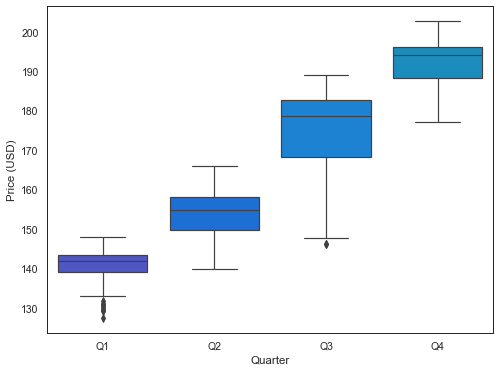

In [19]:
# Styling
sns.set_style('white')

# Plotting
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'Quarter', y = 'Price', data = netflix_stocks_quarterly)

# Formatting the y-axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Axis labels and title
ax.set_title('Quarterly Report')
plt.xlabel('Quarter')
plt.ylabel('Price (USD)')

This box plot highlights the spread of data within Q3. This visualization points demonstrates the greater volatility of NFLX during Q3 of 2017. 

### Distribution of Netflix Stock Price

I will begin by creating a plot to gain a better understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, I want to see in which quarter stock prices flucutated the most. This will be accomplished using a violin plot with four violins, one for each business quarter!

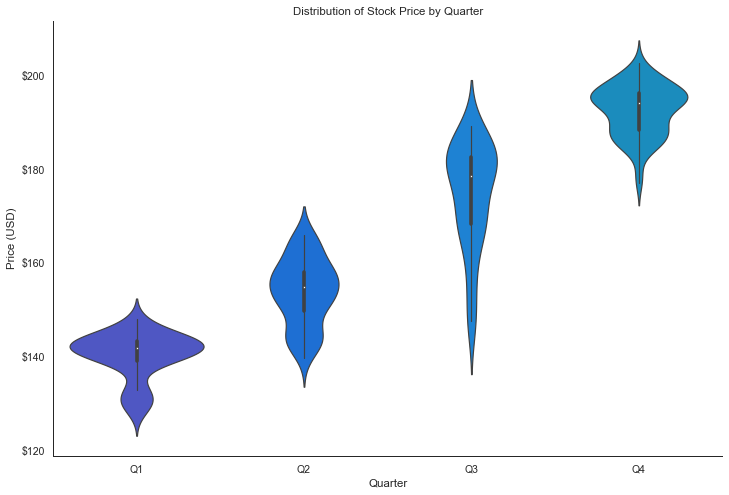

In [20]:
# Styling
sns.set_style('white')
sns.set_context('paper', font_scale = 1.2)

# Plotting
f, ax = plt.subplots(figsize=(12,8))
sns.violinplot(x = 'Quarter', y = 'Price', data = netflix_stocks_quarterly)

# Formatting the y-axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Axis labels and title
sns.despine()
ax.set_title('Distribution of Stock Price by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Price (USD)')
plt.savefig('violin_dist.png')

### Estimated vs Actual EPS

Next, I will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. I will accomplish this using a scatter chart.

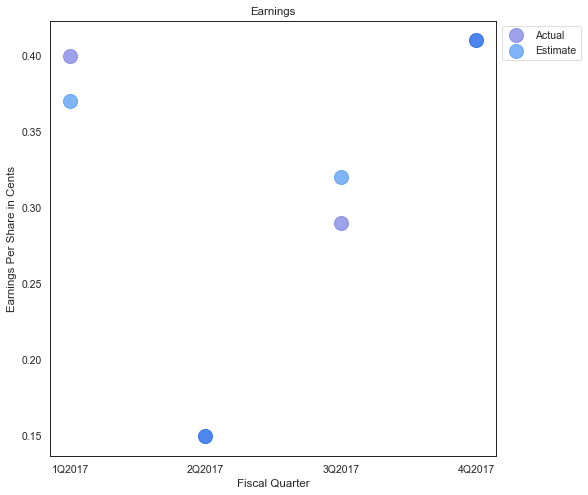

In [12]:
# Preliminary data
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]

# Plotting our scatter plots
plt.figure(figsize=(8,8))
plt.scatter(x_positions, earnings_actual, c = '#3C47D6', s = 200, alpha = 0.5)
plt.scatter(x_positions, earnings_estimate, c = '#006CF1', s =200, alpha = 0.5)

# Formatting
plt.legend(['Actual', 'Estimate'], bbox_to_anchor=(1,1))
plt.xticks(x_positions, chart_labels)
plt.ylabel('Earnings Per Share in Cents')
plt.xlabel('Fiscal Quarter')
plt.title('Earnings')
plt.savefig('actual_estimate.png')
plt.show()

### Earnings vs Revenue 

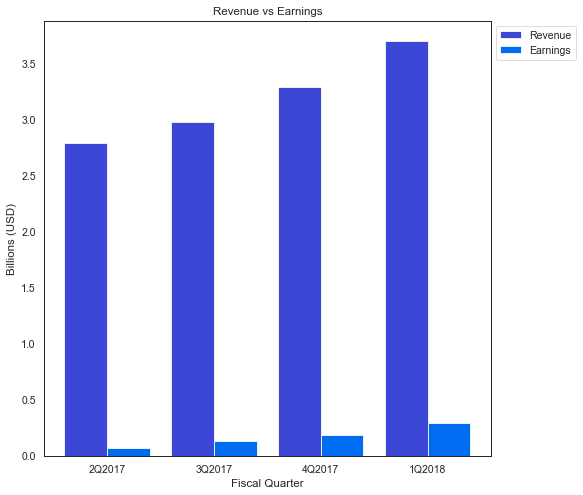

In [14]:
# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

# Revenue
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars1_x = [t*element + w*n for element
             in range(d)]



# Earnings
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars2_x = [t*element + w*n for element
             in range(d)]

# Plotting our graphs
plt.figure(figsize=(8,8))
plt.bar(bars1_x, revenue_by_quarter, color = '#3C47D6')
plt.bar(bars2_x, earnings_by_quarter, color = '#006CF1')

# Formatting
middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
labels = ["Revenue", "Earnings"]
plt.xticks(middle_x, quarter_labels)

plt.xlabel('Fiscal Quarter')
plt.ylabel('Billions (USD)')
plt.title('Revenue vs Earnings')
plt.legend(labels, bbox_to_anchor = (1,1))

plt.show()

### NFLX vs DJI

In this last step, I will compare Netflix stock to the Dow Jones Industrial Average in 2017. This will be accomplished by plotting two line charts side by side in one figure.

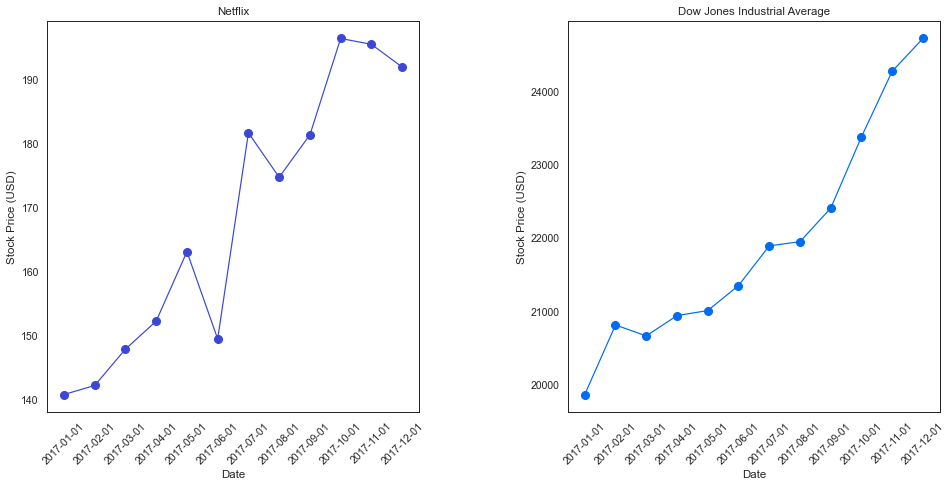

In [16]:
# Left plot Netflix
plt.figure(figsize = (16,8))
ax1 = plt.subplot(1,2,1)
ax1.plot(netflix_stocks['Date'], netflix_stocks['Price'], marker = 'o', ms = 8, color = '#3C47D6')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price (USD)')
ax1.set_title('Netflix')
plt.xticks(rotation = 45)

# Right plot Dow Jones
ax2 = plt.subplot(1,2,2)
ax2.plot(dowjones_stocks['Date'], dowjones_stocks['Price'], marker = 'o', ms = 8, color = '#006CF1')
ax2.set_xlabel('Date')
ax2.set_ylabel('Stock Price (USD)')
ax2.set_title('Dow Jones Industrial Average')
plt.xticks(rotation = 45)

plt.subplots_adjust(wspace = 0.4, bottom = 0.2)

plt.savefig('compare.png')
plt.show()
